# Homework 3: Random Variables and Their Distributions
***

**Name**: Toshal Ghimire

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pylab as plt
from scipy.special import binom
%matplotlib inline

boywon=0

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [3]:


BTop = [0,0,0]
BMid = [0,0,0]
BBot = [0,0,0]


b = [BTop,BMid,BBot] #b is the tic tac toe board 




def iswinner(b,l):
    if ((b[0][0] == l and b[0][1] == l and b[0][2] == l) or
        (b[1][0] == l and b[1][1] == l and b[1][2] == l) or 
        (b[2][0] == l and b[2][1] == l and b[2][2] == l) or
        (b[0][0] == l and b[1][0] == l and b[2][0] == l) or
        (b[0][1] == l and b[1][1] == l and b[2][1] == l) or
        (b[0][2] == l and b[1][2] == l and b[2][2] == l) or
        (b[0][0] == l and b[1][1] == l and b[2][2] == l) or
        (b[0][2] == l and b[1][1] == l and b[2][0] == l)):
        return True
    else: 
        return False


def boysTurn(b):
    while True:
        x = random.randint(0, 2)
        y = random.randint(0, 2)
        if (b[x][y] == 0):
            b[x][y]='X'
            return b
            break
            
    

def womenTurn(b):
    while True:
        x = random.randint(0, 2)
        y = random.randint(0, 2)
        if (b[x][y] == 0):
            b[x][y]='O'
            return b
            break
    

def oneGame(b):
    b = reset(b)
    b = boysTurn(b)
    b = womenTurn(b)
    b = boysTurn(b)
    b = womenTurn(b) 
    b = boysTurn(b)
    b = womenTurn(b) 
    b = boysTurn(b)
    b = womenTurn(b) 
    b = boysTurn(b)

    boywon = iswinner(b,'X')
    b = reset(b)
    return boywon

def reset(b):
    BTop = [0,0,0]
    BMid = [0,0,0]
    BBot = [0,0,0]
    b = [BTop,BMid,BBot]
    return b


def simulation(b,trials):
    i = 0 
    countWon = 0
    while (i < trials):
        a = oneGame(b)
        countWon +=a
        i = i + 1
    return (countWon/trials)


simulation(b,10000)




0.7723

for my problem one i have 6 functions: I inmplemented this using a two dimensional array  

**iswinner(board, 'X' )** is a function that returns true if the char in the second paramater is the winner of the game
i used if statements with ands and ors to return true if the 8 possible ways to win has been met

**reset(board)** is a function that takes the two dimentional array and resets it so all elements are 0 again 


**oneGame(board)** is a function that runs until the board is filled, it calls the **isWinner** function once the board is filled, and returns true or false based on if the boy won or not, it also calls the **reset** function at the begining and the end of the function, this is so the turn functions dont go into an infinite loop

The two turn functions i have is **boyTurn(board)** and ** womanTurn(board)** these functions run infinitly until the value of board[x][y] == 0, meaning that the spot is empty and there isnt already an X or a O in it. if it finds a zero then it plugs in 'X' in boyTurn and 'O' in womanTurn at that array index. The array index x and y are randomly generated by using randint this is how the game is randomly inputed

the last function is the **simulation** that takes board and number of trials as its arguments, and does a while loop, it calls oneGame a number of times based on the second argument and sums all the times that TRUE was returned in oneGame, then it returns the count divided by the number of trials, and this is the probality of the boy winning if they both played randomly 

I found the probaly to be about 0.7784 this is beacuse the boy will always get one more move then the old women beacuse he started first and the number of spots in the board is odd


### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

c = 9 

i found this vlaue by doing the integral of the function
$$ \int_1^{10} {\frac{10}{cx^2} dx} $$

$$  \frac{-10}{cx}\mid_{1}^{10}  $$

$$  \frac{1}{c}~\frac{-10}{x}\mid_{1}^{10}  $$

$$  \frac{1}{c}~(\frac{-10}{10} - \frac{-10}{1})  $$

$$  \frac{1}{c}~(-1 + 10)  $$

$$ \frac{9}{c}$$

since this value has to equal 1 we know that c must be 9

$$ c = {9} $$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

we do this by intgrating from 1 to y of the PDF function 

$$  F(y) = \int_1^{y} {\frac{10}{9x^2} dx} $$

$$= \frac{10}{9}~\int_1^{y} {\frac{1}{x^2} dx} $$

$$= \frac{10}{9}~\frac{-1}{x}\mid_{1}^{y}  $$

$$= \frac{10}{9}~(\frac{-1}{y} - \frac{-1}{1} )  $$

$$= \frac{10}{9}~(\frac{-1}{y} + 1 )  $$

$$F(y) = \frac{10}{9}-\frac{10}{9y}   $$


**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

to find the probalty of a tire going longer then 8 years, it is F(10) - F(8)  or 1-F(8)

$$ F(8) = \frac{10}{9} - \frac{10}{9~(8)} $$

$$ 1 - \frac{10}{9} - \frac{10}{9~(8)} $$

$$ 1 - 0.9722 $$

$$ 0.0277 $$

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

$$ F(y) = \frac{10}{9} - \frac{10}{9~y} $$

$$ 0.9 = \frac{10}{9} - \frac{10}{9~(y)} $$

$$ 0.9 - \frac{10}{9} = - \frac{10}{9~(y)} $$

$$ 9~y = - \frac{10}{0.9 - \frac{10}{9}} $$

$$ y = - \frac{\frac{10}{0.9 - \frac{10}{9}}}{9} $$

$$ y = 5.2632 $$

if were asked just in years, then it will take 6 years,other wise it will take 5.2632 years  

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 


since all four tires are independent of one another and 0.0277 is the probality of one tire lasting longer then 8 years, so for all four tires we would do $ 0.0227^4 $
witch is 0.000000265523


### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [4]:
def pmf_natural(x):
    a = math.log10((x+1)/x) 
    return a 

c = 0
for i in range(9):
    if (pmf_natural(i+1) >= 0):
        c += pmf_natural(i+1)
c

1.0

In my forloop ranging from i = 1 to 9, i first test if pmf_natural(i) is positive, if it is then i sum all the results and store it in variable c, as you can see this is a valid PMF function beacuse all the results are positive and they sum up to 1 

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

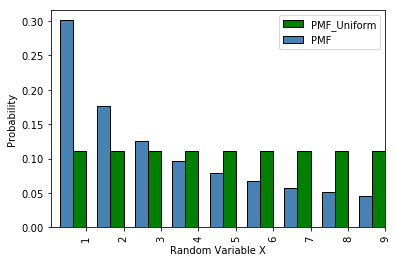

In [10]:
df = pd.DataFrame( {'RandVar_X' : range(1, 10 ,1),})
df["PMF"] = df.RandVar_X.apply(pmf_natural)
df["PMF_Uniform"] = 1/9
fig, ax = plt.subplots()


df.plot.bar(x="RandVar_X", y="PMF_Uniform",ax=ax, color="green",position=1,width =.35,edgecolor="black")
df.plot.bar(x="RandVar_X", y="PMF",ax=ax, color="steelblue",position=2,width =.35,edgecolor="black")
ax.set_xlabel("Random Variable X")
ax.set_ylabel("Probability")





**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [6]:
def cdf_natural(y):
    a = sum(pmf_natural(x) for x in range (1,y+1))
    return a 
x = 4
y= 5
print("F(",x,") =",cdf_natural(x))
print("F(",y,") =",cdf_natural(y))

F( 4 ) = 0.6989700043360189
F( 5 ) = 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

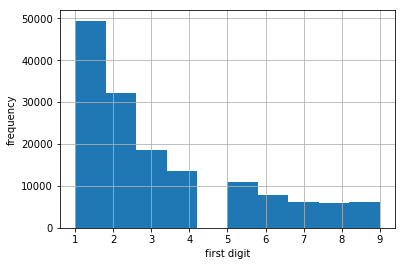

In [7]:
df = pd.read_table("tax_data.txt")
df = df[df["Tax_Incomes"] != 0]
fig, ax = plt.subplots()

def getfirst(x):
    a = int(str(x)[0])
    return a

df["first"] = df["Tax_Incomes"].apply(getfirst)

df["first"].hist()

ax.set_xlabel("first digit")
ax.set_ylabel("frequency");


if we plot the first intger from each row, we get a distribution graph that is exactly like the graph from part B. this means that the distribution is not uniform therefore this is not a fraud

**NOTE for grader** for some reason there is a gap in my graph, but if you count the amount of bars or look at my dataframe all the values are infact there. i tried many ways to get rid of this but couldnt figure it out

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 




this is a poissan distibution, where lambda is the average rate, in our case 20, and X is the random variable representing the number of boats that pass through

$$ \frac{\lambda^{x}~e^{-\lambda }}{{x!}}$$

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

$$ p(X=25) = \frac{\lambda^{x}~e^{-\lambda }}{{x!}}$$
$$  = \frac{\lambda^{25}~e^{-\lambda }}{{25!}}$$

 we know that $ \lambda $ is equal to 20 so 
 
 $$  = \frac{20^{25}~e^{-20 }}{{25!}}$$
 

In [8]:
def poisson(lam,x,CP=0):
    a = lam ** x 
    b = math.exp(-lam)
    c = math.factorial(x)
    #if the optional paramater is entered, it calcuates the cumulated probality
    # so p(X <= x)
    if(CP == 1):
        out = 0
        for i in range(1,x+1):
            out = out + poisson(lam,i)
        return out
    #for p(X < x)
    elif(CP == 2):
        out = 0
        for i in range(1,x):
            out = out + poisson(lam,i)
        return out
    else:
        return ((a*b)/c)



In [9]:
print("probability that 25 boats cross under the bridge on a particular day is",poisson(20,25))

probability that 25 boats cross under the bridge on a particular day is 0.04458764910826788


my function for caluating poisson distributions takes 2 arguments (lambda and x) and one optional agrument (CP aka Cummulative poisson), it uses the math libary to find factorial and exponent. if the optional paramater CP is not inputed it calcuates the poisson distribution at x, if CP = 1 then it calcuates P(X<=x) by summing each value from 1 to x in a for loop, if CP == 1, it returns P(X < x) using the same methods 

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

$$ p(X \le 15) =\sum \frac{\lambda^{x}}{{x!}}~e^{-\lambda }$$


In [17]:
out = 0
for i in range(1,16):
    out += poisson(20,i)
out

1- poisson(6,2)


0.9553824608200056

In [12]:
print("probability that 15 boats  or fewer cross under the bridge on a particular day is",poisson(20,15,1))

probability that 15 boats  or fewer cross under the bridge on a particular day is 0.1565131325785894


**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

first we must change our lamda value from 20 beacuse 20 is in per day, to change it we do 20/24 and there is 0.8333333333333334 ships per hour, that is our new lamda

times wating between two events is given by this formula $  1 - e^{-\lambda t} $
so to find the probality a boat passing between 2 hours and 1 hours we use this formula 

we do the following operations with our new lambda

$  1 - e^{-\lambda t}$ 
when t = 2  
minus  
$ 1 - e^{-\lambda t}$  when t= 1



below is the code for it

In [253]:
a = (1-math.exp(-(20/24)*2)) - (1-math.exp(-(20/24)*1))

print("There is a",a,"probablity that a ship passes between 1 and 2 hours")

There is a 0.24572260566951643 probablity that a ship passes between 1 and 2 hours


**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

In [250]:
def boat_count(lam):
    #probality cant be above one hence my while loop
    above1 = 0 
    c = 0 
    while above1 <1:
        above1 += np.random.exponential(1/lam)
        c += 1
    if above1 > 1:
        c -= 1
    return c
     
boat_count(20)

22

the code counts the number of boats based on weather the sum of all random.exponential is equal to 1 

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [251]:
def boat_count_sim(lam, num_days=int(1e3)):
    df = pd.DataFrame({"boats":0,"day": range(1,num_days,1)})
    for i in range(num_days):
        df.loc[i,"boats"] = boat_count(lam)
    return df
a = boat_count_sim(20)

le15 = np.sum(a["boats"] <= 15) / 1e3

a["round"] = a["boats"].apply(round)
le15 = np.sum(a["round"] <= 15) / 1e3
print("probability that 15 boats or fewer cross under the bridge on a particular day is",le15)

probability that 15 boats or fewer cross under the bridge on a particular day is 0.163


my estimate by hand and also this fucntion agrees with eachother. my hand calcuations was 0.15651 and the function calcuations varries around my hand calcuations 

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [255]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    df = pd.DataFrame({"hours":0,"boats": range(1,num_boats)})
    for i in range(num_boats):
        df.loc[i,"hours"] = hours_count(lam)
    return df 

def hours_count(lam):
    #probality cant be above one hence my while loop
    above1 = 0 
    c = 0 
    while above1 <1:
        above1 += np.random.exponential(lam)
        c += 1
    if above1 > 1:
        c -= 1
    return c

a = boat_time_sim(20/24)
b = np.sum(a["hours"] == 2)


c = b/1e3

print("probability that boats arrive between 1 and 2 hours apart is",c)

probability that boats arrive between 1 and 2 hours apart is 0.217


i changed my boats counter function from above part f from boats per day, to day per boats by inversing the lambda value, the probality is an average 0.02 less then what i calcuated in part D

### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


$$ P(X=k) = {n \choose k}(1-p)^{n-k} ~ p^{k} $$

n = 6, k = 6 and p = .55 

$$ P(X=6) = {8 \choose 6}(1-0.55)^{8-6} ~ 0.55^{6} $$

since we need to win on the 8th game, we subtract 1 from n and k in the $ {n \choose k}$

$$ P(X=6) = {7 \choose 5}(1-0.55)^{8-6} ~ 0.55^{6} $$

$$ P(X=6) = {21}~(0.45)^{2} ~ 0.55^{6} $$


$$ P(X=6) = 0.11771192423 $$

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

In [146]:
def Binomial(n,k,p):
    return binom(n,k) *  (p**k) * (1-p)**(n-k)

def wingame(series,prob):
    a = series //2 + 1
    b = prob * np.sum([Binomial(i, a-1,prob) for i in range(a-1,series)])
    return b

wingame(11,0.55)

0.63312258082884765

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

In [145]:
a = wingame(11,.7)
a

0.9217752090400001

to find this we use the expted value formula, witch is the $\sum x ~  p(x_i)$ where x is the money the team gets if they win the series, and $p(x_i)$  is the probality of them wining the game 

In [144]:
 print("The expeted payout for a 11 game series is",94000*wingame(11,0.7))

The expeted payout for a 11 game series is 86646.8696498


i used my wingame formula to find the probality of wining if wining a game is 70 precent multipied by the max payout by winning 

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


The longer the serires the more chance that the team has to win the seires and the shorter the series the the less you have a chance of winning. That being said, the longer the series would mean you will win more games witch means that you pay bob more as you go along, the shoter the series, if you win you will pay bob less since you need less games won to win the series

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

The best series lenth to choose is 15 beacuse this series length has the higest payout at 8699.87459946


,prob,seriesNum,expected
0,0.784000,3,7640.00000
1,0.836920,5,8069.20000
2,0.873964,7,8339.64000
3,0.901191,9,8511.91340
4,0.921775,11,8617.75209


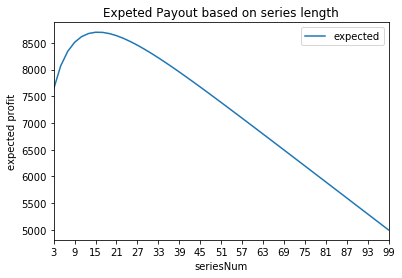

In [153]:
def optimal_series(p):
    df = pd.DataFrame({"prob":0,"seriesNum": range(3,100,2)})
    a = []
    for i in range(3,100,2):
        a.append(wingame(i,p))
        
    df["prob"] = a
    df["expected"] = df["prob"] * (10000) - [(i //2 +1) * 100 for i in range(3,100,2) ]
    
    maxPayout = df["expected"].max()
    optimalSeries = df.loc[(df.expected == maxPayout).idxmax, "seriesNum"]
    
    return maxPayout,optimalSeries,df
    
maxPayout,OptimalSeries,df = optimal_series(0.7)

print("The best series lenth to choose is",OptimalSeries,"beacuse this series length has the higest payout at",maxPayout)

fig, ax = plt.subplots()

graph = df.plot.line(x="seriesNum", y="expected",xticks=range(3,100,6), ax=ax)
ax.set_ylabel("expected profit");
ax.set_title("Expeted Payout based on series length");

df.head()

in my functions i used range(3,100,2) to find each possible series length, and based on that length i used a forloop to determine how much bob would take for winning. To find the probality to win the game i used my function wingame from the above problem, stored that into an array for each possible series length. the function returns maxPayout( by using the max() function), optimalseries (by using loc in line 11) and the dataframe.

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
